<a href="https://colab.research.google.com/github/aksweb/Feynn_labs_market_segmentation/blob/main/FeynnLabs_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('mcdonalds.csv')

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
col= df.columns
print(col), df.shape

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


(None, (1453, 15))

##Converting yes no to 1/0

In [ ]:
mtx=df.iloc[:, 0:11].applymap(lambda x:1 if x=="Yes" else 0)

In [ ]:
# df.head()
mtx

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


##Stats Information

In [ ]:
# claculating mean
col_mean= np.round(mtx.mean(), 2)
print(col_mean)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(mtx, rowvar=False)
print(cov_matrix)

[[ 0.24739828  0.0365393   0.00126697 -0.01469601 -0.03772522  0.01593265
   0.02561623  0.16371893 -0.01472303  0.04909383 -0.08959046]
 [ 0.0365393   0.08377556  0.00243962  0.00358193 -0.01546103  0.02109343
   0.02151102  0.04016578 -0.02275761  0.01146862 -0.04231769]
 [ 0.00126697  0.00243962  0.08489702 -0.00408768  0.00784877  0.00177129
   0.00245763  0.00853369  0.00642444  0.01236209  0.00410427]
 [-0.01469601  0.00358193 -0.00408768  0.11526451  0.05414181  0.00464177
  -0.00443464 -0.01423719  0.01451163 -0.0458764   0.02127308]
 [-0.03772522 -0.01546103  0.00784877  0.05414181  0.24946961 -0.0087176
  -0.01794236 -0.03911922  0.03527659 -0.04211956  0.06897148]
 [ 0.01593265  0.02109343  0.00177129  0.00464177 -0.0087176   0.08989665
   0.03706637  0.02094128 -0.02899956  0.00402227 -0.01774992]
 [ 0.02561623  0.02151102  0.00245763 -0.00443464 -0.01794236  0.03706637
   0.24041169  0.0327545  -0.16966654  0.02545318 -0.02642059]
 [ 0.16371893  0.04016578  0.00853369 -0.0

In [ ]:
# Step 4: Eigenvalue and Eigenvector Calculation for transformation
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# print(eigenvalues, eigenvectors)


In [ ]:
# Step 5: Sort Eigenvalues to get the most relevant feature
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

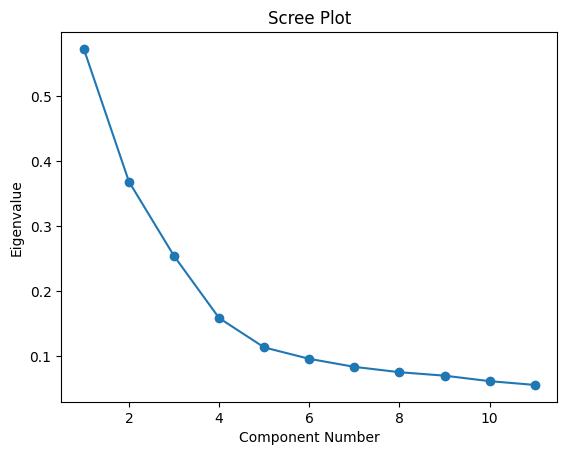

In [ ]:
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()


#From the above Scree plot we observe that graphs starts to level off at 5
# *So we have n_components for Kmeans=5*

In [ ]:
# Step 6: Select Principal Components
num_components = 5  # Choose the number of components to retain
selected_eigenvectors = eigenvectors[:, :num_components]

In [ ]:
# Step 7: Projection
reduced_data = np.dot(mtx, eigenvectors)
rdf= pd.DataFrame(reduced_data)
rdf.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.155737,0.113999,0.574430,-0.407152,0.180036,1.713560,0.641360,-0.018345,-0.130284,-0.450863,-0.930793
1,-0.799742,-0.493270,1.968512,-0.100577,0.023001,1.410389,0.525256,0.179647,-0.060754,-0.428470,-0.864160
2,-0.205690,-0.835515,1.359725,0.686410,0.817975,2.011199,-0.153733,-0.219488,0.373010,0.003085,-0.120978
3,-0.754031,0.247673,2.081480,0.201146,-0.703083,1.359925,0.483663,0.376367,0.078725,0.315522,-0.414753
4,-0.394047,0.702530,1.209149,0.542480,0.832405,1.421097,0.886422,-0.026867,0.125132,0.032946,-0.281475


In [ ]:
from sklearn.decomposition import PCA

num_components = 5  # Choose the number of components to retain
pca = PCA(n_components=num_components)
pca.fit(mtx)  # Fit PCA on your original data


PCA(n_components=5)

#Sats

In [ ]:

# Calculate explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Calculate principal components (eigenvectors)
principal_components = eigenvectors.T  # Transpose eigenvectors if needed

# Calculate singular values (square roots of eigenvalues)
singular_values = np.sqrt(eigenvalues)

# Print the statistics
print("Explained Variance Ratio:", explained_variance_ratio)
print("Principal Components (Eigenvectors):\n", principal_components)
print("Singular Values (Square Roots of Eigenvalues):", singular_values)

##Calculation for num_pc

In [ ]:
# Calculate the number of non-zero eigenvalues
non_zero_eigenvalues = np.sum(eigenvalues > 0)

# Calculate the number of principal components (minimum of num_components and non_zero_eigenvalues)
num_pc = min(num_components, non_zero_eigenvalues)

In [ ]:
load = principal_components
# num_pc = pca.n_features_
pc_list = ["Principal Component"+str(i) for i in list(range(1, num_pc+1))]
load_df = pd.DataFrame.from_dict(dict(zip(pc_list, load)))
load_df['feature'] = rdf.columns.values[0:11]
load_df = load_df.set_index('feature')
load_df

,Principal Component1,Principal Component2,Principal Component3,Principal Component4,Principal Component5
feature,,,,,
0,-0.476933,-0.363790,0.304444,0.055162,-0.307535
1,-0.155332,-0.016414,0.062515,-0.142425,0.277608
2,-0.006356,-0.018809,0.037019,0.197619,0.070620
3,0.116232,0.034094,0.322359,-0.354139,-0.073405
4,0.304443,0.063839,0.802373,0.253960,0.361399
5,-0.108493,0.086972,0.064642,-0.097363,0.107930
6,-0.337186,0.610633,0.149310,0.118958,-0.128973
7,-0.471514,-0.307318,0.287265,-0.002547,-0.210899
8,0.329042,-0.601286,-0.024397,0.067816,-0.003125


#Plot

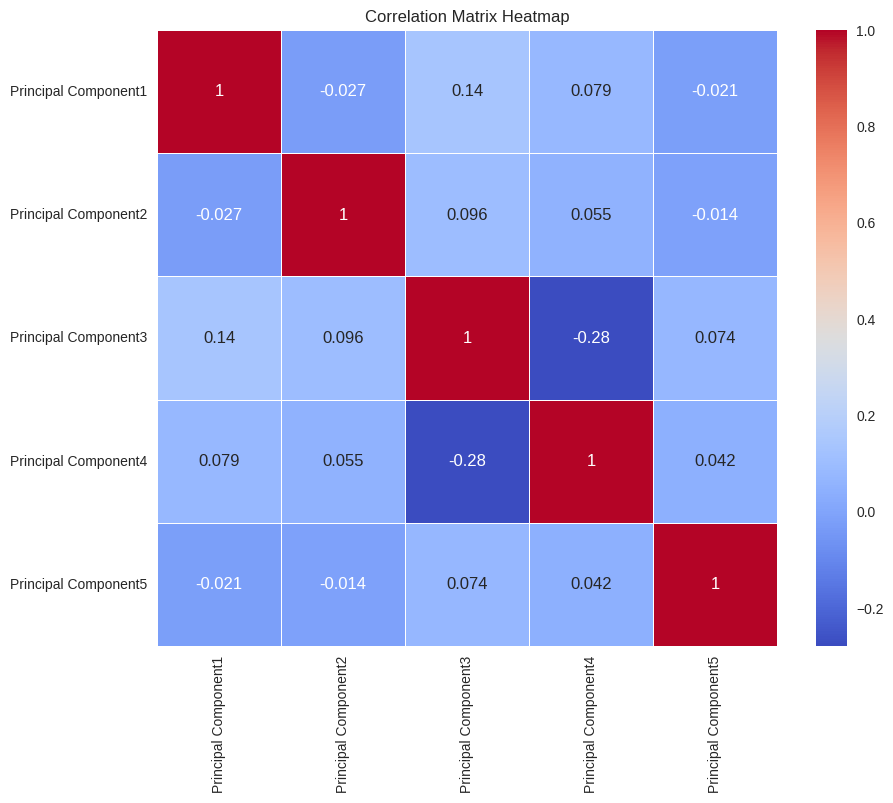

In [ ]:
import pandas as pd
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = load_df.corr()
# print(correlation_matrix)
# # Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
!pip install bioinfokit

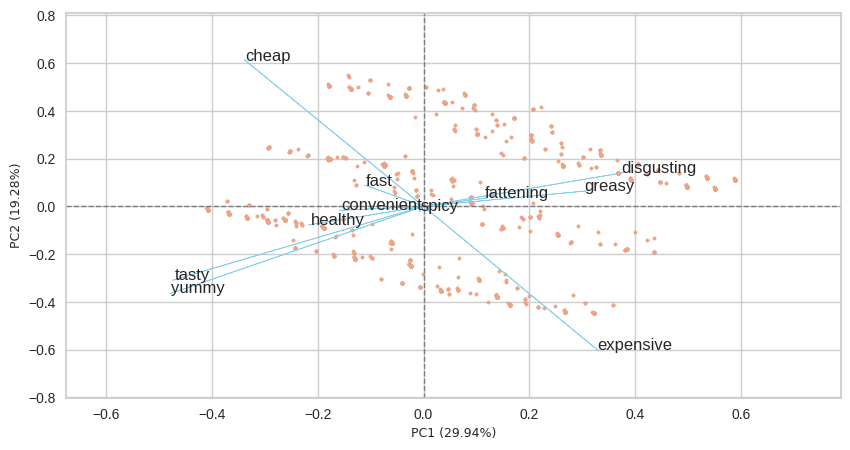

In [ ]:
from sklearn.decomposition import PCA
from bioinfokit.visuz import cluster


# Create a PCA object with the desired number of components
num_components = 5  # Choose the number of components to retain
pca = PCA(n_components=num_components)

# Fit PCA to your data and transform the data
pca_scores = pca.fit_transform(mtx)

# Create a biplot using bioinfokit.visuz.cluster.biplot
cluster.biplot(cscore=pca_scores, loadings=load, labels=mtx.columns.values,
               var1=round(pca.explained_variance_ratio_[0] * 100, 2),
               var2=round(pca.explained_variance_ratio_[1] * 100, 2),
               show=True, dim=(10, 5))


#Using KMeans

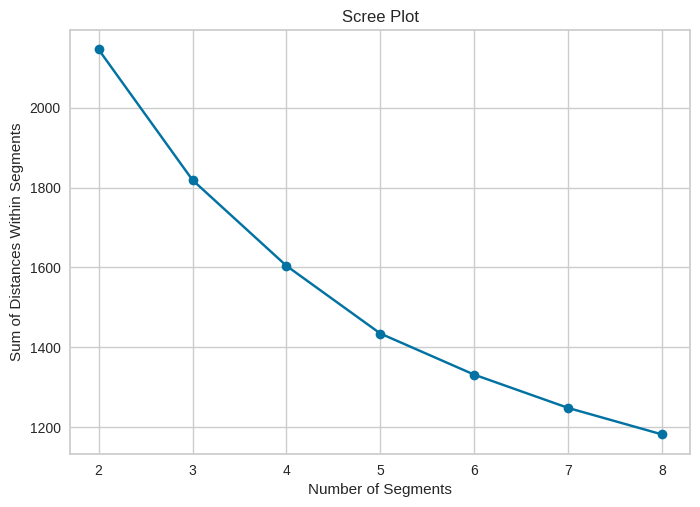

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Set the random seed
np.random.seed(1234)

# Create a dataset MD.x (assuming you have your data loaded)

# Perform k-Means clustering for 2 to 8 segments with 10 random restarts
n_clusters_range = range(2, 9)
n_restarts = 10
segmentations = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_restarts, random_state=1234)
    kmeans.fit(mtx)
    segmentations.append(kmeans)

# Relabel segment numbers to ensure consistency
def relabel_clusters(kmeans_model):
    labels = kmeans_model.labels_
    cluster_centers = kmeans_model.cluster_centers_
    new_labels, _ = pairwise_distances_argmin_min(cluster_centers, mtx)
    return new_labels

relabelled_segmentations = [relabel_clusters(kmeans) for kmeans in segmentations]

# Step 5: Extracting Segments - Plot a scree plot to determine the optimal number of segments
inertia_values = [kmeans.inertia_ for kmeans in segmentations]

plt.plot(n_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Distances Within Segments')
plt.title('Scree Plot')
plt.show()

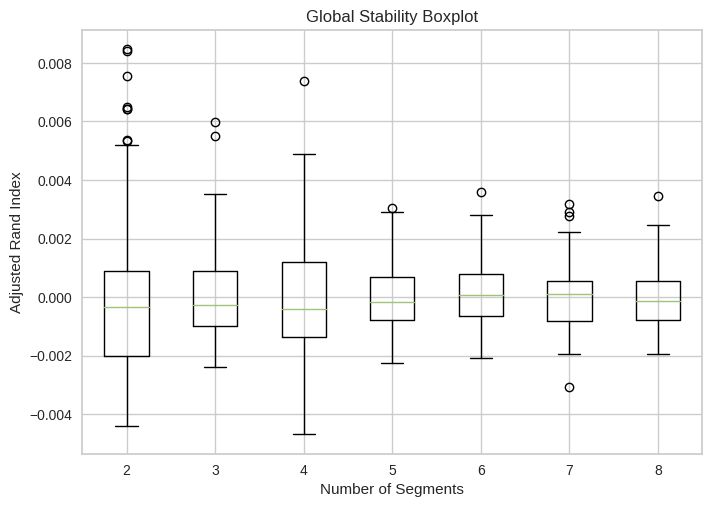

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

# Set the random seed
np.random.seed(1234)


# Define the number of segments to analyze
n_segments_range = range(2, 9)

# Number of bootstrap samples and random initializations
n_boot_samples = 100
n_restarts = 10

# Initialize lists to store stability scores
stability_scores = []

for n_segments in n_segments_range:
    segment_stability_scores = []

    for _ in range(n_boot_samples):
        # Bootstrap resampling of the data
        boot_sample = resample(mtx, random_state=np.random.randint(0, 1000))

        # Perform k-Means clustering with random initializations
        kmeans = KMeans(n_clusters=n_segments, n_init=n_restarts, random_state=np.random.randint(0, 1000))
        kmeans.fit(boot_sample)

        # Calculate the Adjusted Rand Index as a stability measure
        ari = adjusted_rand_score(kmeans.labels_, kmeans.predict(mtx))
        segment_stability_scores.append(ari)

    stability_scores.append(segment_stability_scores)

# Plot a boxplot to visualize the global stability
plt.boxplot(stability_scores, labels=n_segments_range)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Boxplot')
plt.show()

#Getting optimal value of k in KMeans using Distortion score & Elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

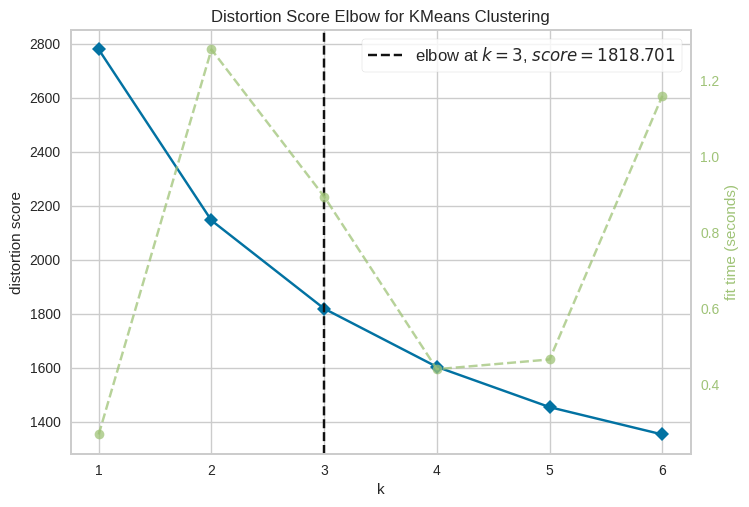

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Define the range of cluster numbers to consider
cluster_range = range(1, 7)

# Create a KMeans model for the elbow visualizer
model = KMeans()

# Create the KElbowVisualizer
visualizer = KElbowVisualizer(model, k=cluster_range)

# Fit the visualizer to your data (replace 'your_data' with your dataset)
visualizer.fit(rdf)

# Visualize the distortion and find the elbow point
visualizer.show()



#Thus Optimal value of k= 3
